In [22]:
"""This is a Regression Problem, where output is not classified in binary or multi-class, instead it is a regression problem, where output is a number.
"""
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("dl5gretoeflgraduate.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.shape

(500, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.drop(columns=['Serial No.'], inplace=True)
#Min-Max Scaling, would be used as we know max score in GRE and TOEFL, instead of Standard Scaling

In [28]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1] #All rows by : and columns from 0 to -1
y=df.iloc[:,-1] #All rows with last column


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear')) #In case of linear Regression Task, the output layer must have linear as activation function
model.summary()

C:\Users\q\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='mean_squared_error', optimizer='Adam')
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.6430 - val_loss: 0.5947
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5148 - val_loss: 0.4697
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4082 - val_loss: 0.3782
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3343 - val_loss: 0.3124
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2800 - val_loss: 0.2546
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2264 - val_loss: 0.2029
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1797 - val_loss: 0.1562
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1372 - val_loss: 0.1162
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0935 - val_loss: 0.0839
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0692 - val_loss: 0.0592
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0484 - val_loss: 0.0422
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [34]:
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


0.7940251664127408

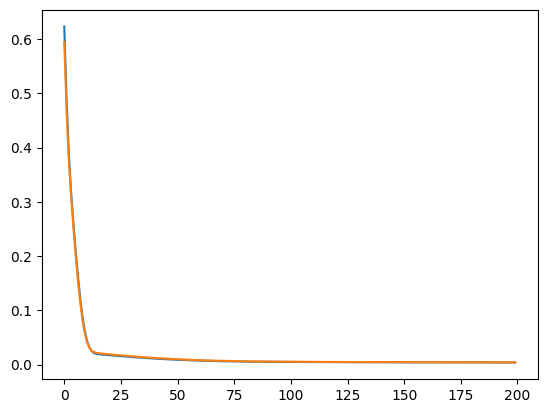

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])